# Information Retrieval

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np

<img src="tf.png" >
<img src="idf.png" >
<img src="tfidf.png" >

In [93]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [108]:
#cv = CountVectorizer(ngram_range=[1,1], max_df=0.8, min_df=2, max_features=None, stop_words="english")
cv = TfidfVectorizer(ngram_range=[1,2], max_df=0.2, min_df=20, max_features=None, stop_words="english")

In [109]:
TNG_cv = cv.fit_transform(TNG_train.data)

In [110]:
#Tamaño del vocabulario
print(f'El tamaño del vocabulario es {len(cv.get_feature_names())}')

El tamaño del vocabulario es 6573


# Cálculo del Document Frecuency de cada palabra

In [111]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [112]:
doc_freq = np.array(TNG_cv.astype(bool).sum(axis=0)).flatten()

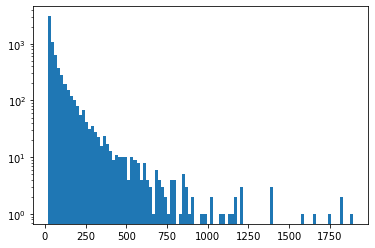

In [113]:
a = plt.hist(doc_freq, bins=100,log=True)
plt.show()

In [114]:
np.linalg.norm(TNG_cv.todense(), axis=0)

array([3.93870688, 2.62301163, 0.74380778, ..., 2.15093335, 1.41010202,
       0.88348307])

In [115]:
TNG_norm = (TNG_cv.toarray().T/(np.linalg.norm(TNG_cv.toarray(), axis=-1)+1e-8)).T

In [116]:
TNG_norm.shape

(11314, 6573)

In [117]:
TNG_train.data[87]

'\nHi Noel,\n\nI\'ve made some attempts to write a converter that reads Adobe Type 1 fonts,\ntriangulates them, bevelizes them and extrudes them to result in a generic\n3d object which could be used with PoV f.i.\n\nThe problem I\'m currently stuck on is that theres no algorithm which\ntriangulates any arbitrary polygonal shape. Delaunay seems to be limited\nto convex hulls. Constrained delaunay may be okay, but I have no code\nexample of how to do it.\n\nAnother way to do the bartman may be\n\n- TGA2POV\n- A selfmade variation of this, using heightfields.\n\n  Create a b/w picture (BIG) of the text you need, f.i. using a PostScript\n  previewer. Then, use this as a heightfield. If it is white on black,\n  the heightfield is exactly the images white parts (it\'s still open\n  on the backside). To close it, mirror it and compound it with the original.\n\nExample:\n\nobject {\n   union {\n      height_field { gif "abp2.gif" }\n      height_field { gif "abp2.gif" scale <1 -1 1>}\n   }\n  

In [118]:
cosines = np.dot(TNG_norm[87], TNG_norm.T)

In [119]:
max(cosines)

0.9999999800000003

In [120]:
print(cosines)

[0.         0.         0.01081641 ... 0.00304368 0.02910263 0.03393423]


In [107]:
neigh_idx = np.array(cosines).flatten().argsort()[::-1]

In [90]:
for idx in neigh_idx[0:10]:
    print(idx)
    print(TNG_train.data[idx])
    print(f'Clase {TNG_train.target_names[TNG_train.target[idx]]}')
    print("-----------------------------------------------------------------------")

87

Hi Noel,

I've made some attempts to write a converter that reads Adobe Type 1 fonts,
triangulates them, bevelizes them and extrudes them to result in a generic
3d object which could be used with PoV f.i.

The problem I'm currently stuck on is that theres no algorithm which
triangulates any arbitrary polygonal shape. Delaunay seems to be limited
to convex hulls. Constrained delaunay may be okay, but I have no code
example of how to do it.

Another way to do the bartman may be

- TGA2POV
- A selfmade variation of this, using heightfields.

  Create a b/w picture (BIG) of the text you need, f.i. using a PostScript
  previewer. Then, use this as a heightfield. If it is white on black,
  the heightfield is exactly the images white parts (it's still open
  on the backside). To close it, mirror it and compound it with the original.

Example:

object {
   union {
      height_field { gif "abp2.gif" }
      height_field { gif "abp2.gif" scale <1 -1 1>}
   }
   texture {
      Glass
   }
  